In [2]:
import pandas as pd

# Step 1: Load the data from a .tsv file
# Replace 'file_path' with the actual file path of your .tsv file
file_path = 'data/hnsc_tcga_clinical_data.tsv'
data = pd.read_csv(file_path, sep='\t')

# Step 2: Display the first few rows of the data to understand its structure
print("First 5 rows of the dataset:")
print(data.head())

# Step 3: Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Step 4: Drop or fill missing values (example: dropping rows with missing values)
# Uncomment the line below to drop rows with missing values
# data = data.dropna()

# Alternatively, fill missing values with a default value (example: 0 or 'Unknown')
# Uncomment the line below to fill missing values
# data = data.fillna({'column_name': 'default_value'})

# Step 5: Convert categorical columns to appropriate data types if necessary
# Example: Convert a column to category type
# Uncomment and replace 'categorical_column' with actual column name
# data['categorical_column'] = data['categorical_column'].astype('category')

# Step 6: Perform any additional preprocessing (e.g., removing duplicates, renaming columns)
# Example: Drop duplicate rows
# data = data.drop_duplicates()

# Step 7: Save preprocessed data to a new file (optional)
# Replace 'output_file_path' with your desired output file path
# data.to_csv('output_file_path', sep='\t', index=False)

# Final output
print("\nPreprocessing completed. Data is ready for analysis.")

First 5 rows of the dataset:
    Study ID    Patient ID        Sample ID  Diagnosis Age  \
0  hnsc_tcga  TCGA-4P-AA8J  TCGA-4P-AA8J-01           66.0   
1  hnsc_tcga  TCGA-BA-4074  TCGA-BA-4074-01           69.0   
2  hnsc_tcga  TCGA-BA-4075  TCGA-BA-4075-01           49.0   
3  hnsc_tcga  TCGA-BA-4076  TCGA-BA-4076-01           39.0   
4  hnsc_tcga  TCGA-BA-4077  TCGA-BA-4077-01           45.0   

  American Joint Committee on Cancer Metastasis Stage Code  \
0                                                 MX         
1                                                 M0         
2                                                 M0         
3                                                NaN         
4                                                 M0         

  Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code  \
0                                                N2c                          
1                                                N2c               

In [3]:


# Step 2: Handle missing values for critical numerical and categorical columns
# Filling missing values in 'Diagnosis Age' with the median value
data['Diagnosis Age'].fillna(data['Diagnosis Age'].median(), inplace=True)

# Filling missing values in 'TMB (nonsynonymous)' with the mean value
data['TMB (nonsynonymous)'].fillna(data['TMB (nonsynonymous)'].mean(), inplace=True)

# Filling missing values in 'Patient Smoking History Category' with '[Unknown]'
data['Patient Smoking History Category'].fillna('[Unknown]', inplace=True)

# Step 3: Drop irrelevant or high-missing-value columns
# Dropping 'Primary Therapy Outcome Success Type' due to high missing values
data = data.drop(columns=['Primary Therapy Outcome Success Type'])

# Step 4: Convert categorical columns to category data type
data['Patient Smoking History Category'] = data['Patient Smoking History Category'].astype('category')
data['Person Neoplasm Status'] = data['Person Neoplasm Status'].astype('category')

# Step 5: Drop duplicates
data = data.drop_duplicates()

# Step 6: Rename columns for clarity
data.rename(columns={'Patient ID': 'patient_id', 'Sample ID': 'sample_id', 'Diagnosis Age': 'diagnosis_age'}, inplace=True)

# Display the first few rows of the cleaned dataset
print("First 5 rows of the cleaned dataset:")
print(data.head())

# Save preprocessed data to a new file (optional)
# Replace 'output_file_path' with your desired output file path
# data.to_csv('output_file_path', sep='\t', index=False)

print("\nPreprocessing completed. Data is ready for analysis.")

First 5 rows of the cleaned dataset:
    Study ID    patient_id        sample_id  diagnosis_age  \
0  hnsc_tcga  TCGA-4P-AA8J  TCGA-4P-AA8J-01           66.0   
1  hnsc_tcga  TCGA-BA-4074  TCGA-BA-4074-01           69.0   
2  hnsc_tcga  TCGA-BA-4075  TCGA-BA-4075-01           49.0   
3  hnsc_tcga  TCGA-BA-4076  TCGA-BA-4076-01           39.0   
4  hnsc_tcga  TCGA-BA-4077  TCGA-BA-4077-01           45.0   

  American Joint Committee on Cancer Metastasis Stage Code  \
0                                                 MX         
1                                                 M0         
2                                                 M0         
3                                                NaN         
4                                                 M0         

  Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code  \
0                                                N2c                          
1                                                N2c       

C:\Users\manir\AppData\Local\Temp\ipykernel_13184\3958336721.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Diagnosis Age'].fillna(data['Diagnosis Age'].median(), inplace=True)
C:\Users\manir\AppData\Local\Temp\ipykernel_13184\3958336721.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [4]:
data.describe()


,diagnosis_age,Alcohol Consumption Frequency,Daily Alcohol,Days to Sample Collection.,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Days to Sample Procurement,Disease Free (Months),Disease code,Lymphomatous Extranodal Site Involvement Indicator,Fraction Genome Altered,...,Person Cigarette Smoking History Pack Year Value,Started Smoking Year,Stopped Smoking Year,Specimen Current Weight,Specimen Freezing Means,Specimen Second Longest Dimension,Stage Other,Time between clamping and freezing,Time between excision and freezing,TMB (nonsynonymous)
count,530.000000,225.000000,222.000000,197.000000,529.0,0.0,398.000000,0.0,0.0,524.000000,...,299.000000,283.000000,189.000000,0.0,0.0,305.000000,0.0,0.0,0.0,530.000000
mean,60.913208,4.100000,3.229279,827.898477,0.0,NaN,28.435729,NaN,NaN,0.248821,...,45.802598,1967.325088,1997.269841,NaN,NaN,0.617049,NaN,NaN,NaN,5.562044
std,11.898437,3.086549,4.238885,1293.122530,0.0,NaN,25.211548,NaN,NaN,0.167753,...,35.163896,12.708696,13.852421,NaN,NaN,0.330825,NaN,NaN,NaN,6.936202
min,19.000000,0.000000,0.000000,13.000000,0.0,NaN,0.360000,NaN,NaN,0.000000,...,0.016850,1936.000000,1955.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.200000
25%,53.000000,0.000000,0.000000,117.000000,0.0,NaN,11.630000,NaN,NaN,0.128800,...,25.000000,1959.000000,1990.000000,NaN,NaN,0.400000,NaN,NaN,NaN,2.466667
50%,61.000000,6.000000,2.000000,344.000000,0.0,NaN,21.025000,NaN,NaN,0.232300,...,40.000000,1968.000000,2001.000000,NaN,NaN,0.600000,NaN,NaN,NaN,3.800000
75%,69.000000,7.000000,4.750000,866.000000,0.0,NaN,37.967500,NaN,NaN,0.336525,...,60.000000,1975.000000,2009.000000,NaN,NaN,0.800000,NaN,NaN,NaN,5.925000
max,90.000000,7.000000,33.000000,6651.000000,0.0,NaN,180.030000,NaN,NaN,0.891300,...,300.000000,2001.000000,2013.000000,NaN,NaN,1.800000,NaN,NaN,NaN,106.033333


In [5]:
data['Patient Smoking History Category'].value_counts()
data['Person Neoplasm Status'].value_counts()


Person Neoplasm Status
TUMOR FREE    341
WITH TUMOR    141
Name: count, dtype: int64

<Axes: >

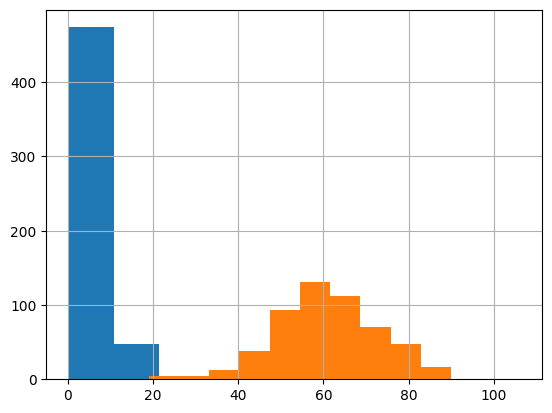

In [7]:
data['TMB (nonsynonymous)'].hist()
data['diagnosis_age'].hist()


<Axes: xlabel='Patient Smoking History Category'>

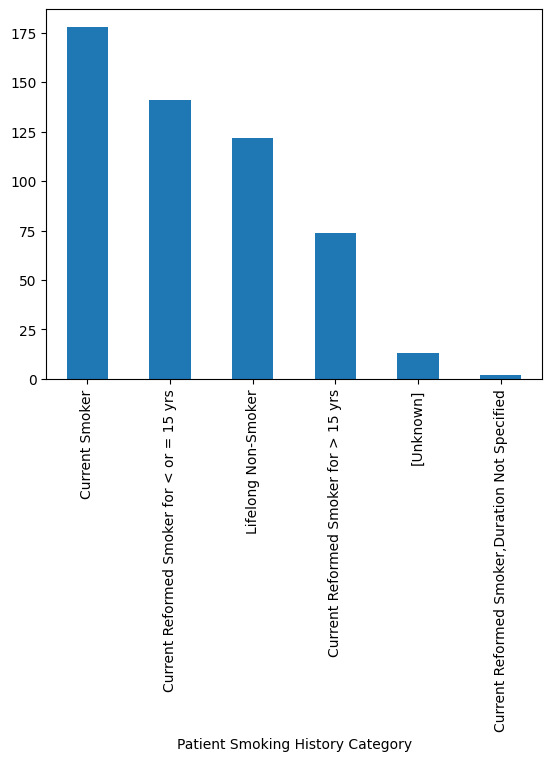

In [8]:
data['Patient Smoking History Category'].value_counts().plot(kind='bar')


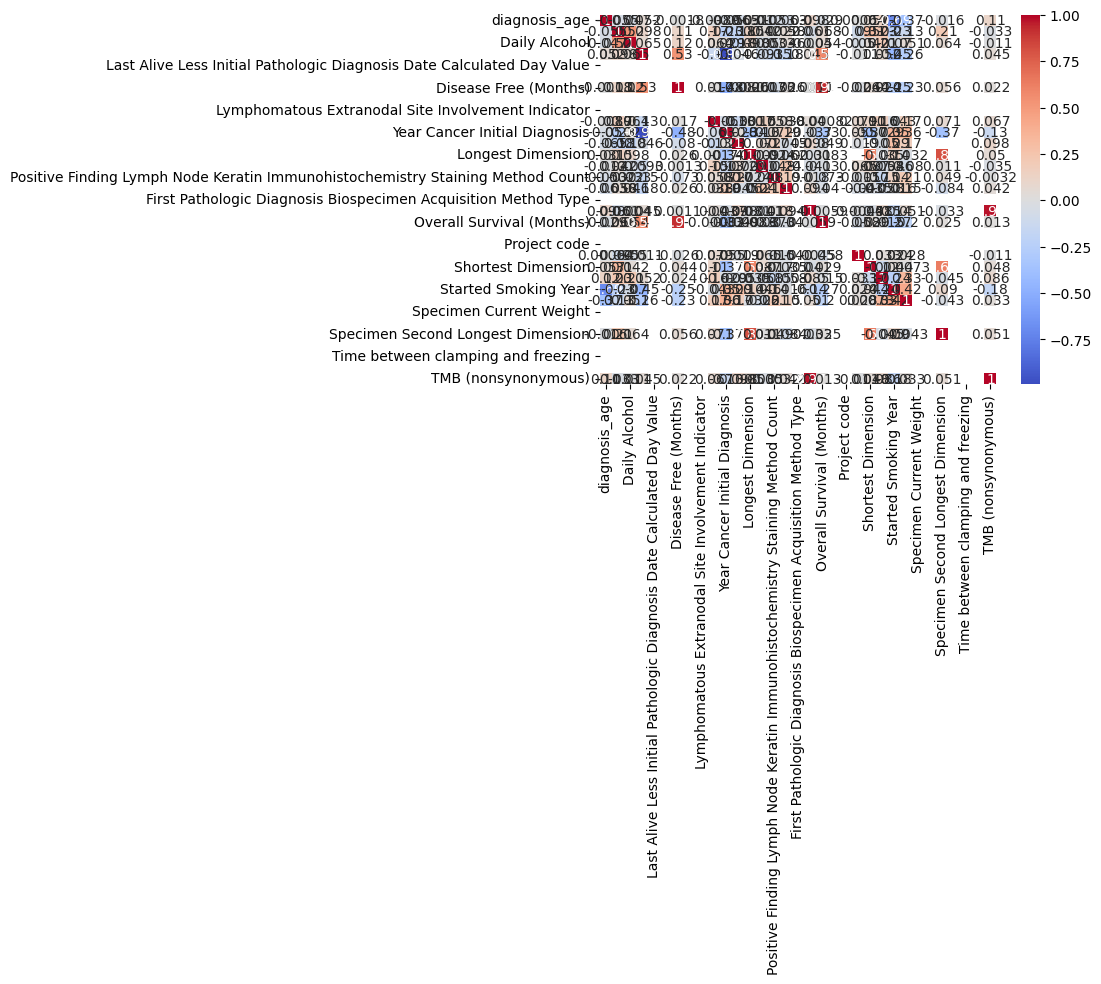

In [10]:
#correlation heatmap to find relationships between numerical variables

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate and plot the correlation matrix
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()



C:\Users\manir\AppData\Local\Temp\ipykernel_13184\2633291855.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Diagnosis Age'].fillna(data['Diagnosis Age'].median(), inplace=True)
C:\Users\manir\AppData\Local\Temp\ipykernel_13184\2633291855.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Outliers in the dataset:
diagnosis_age: [28.0, 24.0, 19.0, 26.0, 26.0, 24.0]
TMB (nonsynonymous): [13.1, 14.8333333333, 13.9, 20.4666666667, 26.3666666667, 13.4, 11.3, 15.4666666667, 15.1333333333, 16.5666666667, 11.9333333333, 11.2, 14.5333333333, 13.8, 14.4333333333, 13.6666666667, 15.2, 21.5666666667, 28.7666666667, 16.3, 11.7666666667, 11.6666666667, 13.5666666667, 15.2666666667, 33.2666666667, 13.9, 11.7, 16.9, 29.0666666667, 17.1, 11.9, 12.9, 11.2333333333, 12.9666666667, 13.5333333333, 63.5333333333, 18.8666666667, 21.1, 17.7333333333, 14.5333333333, 15.7333333333, 20.0, 50.8, 12.5666666667, 106.033333333, 11.8666666667, 17.3666666667, 15.4, 11.4333333333, 18.2333333333, 13.4]


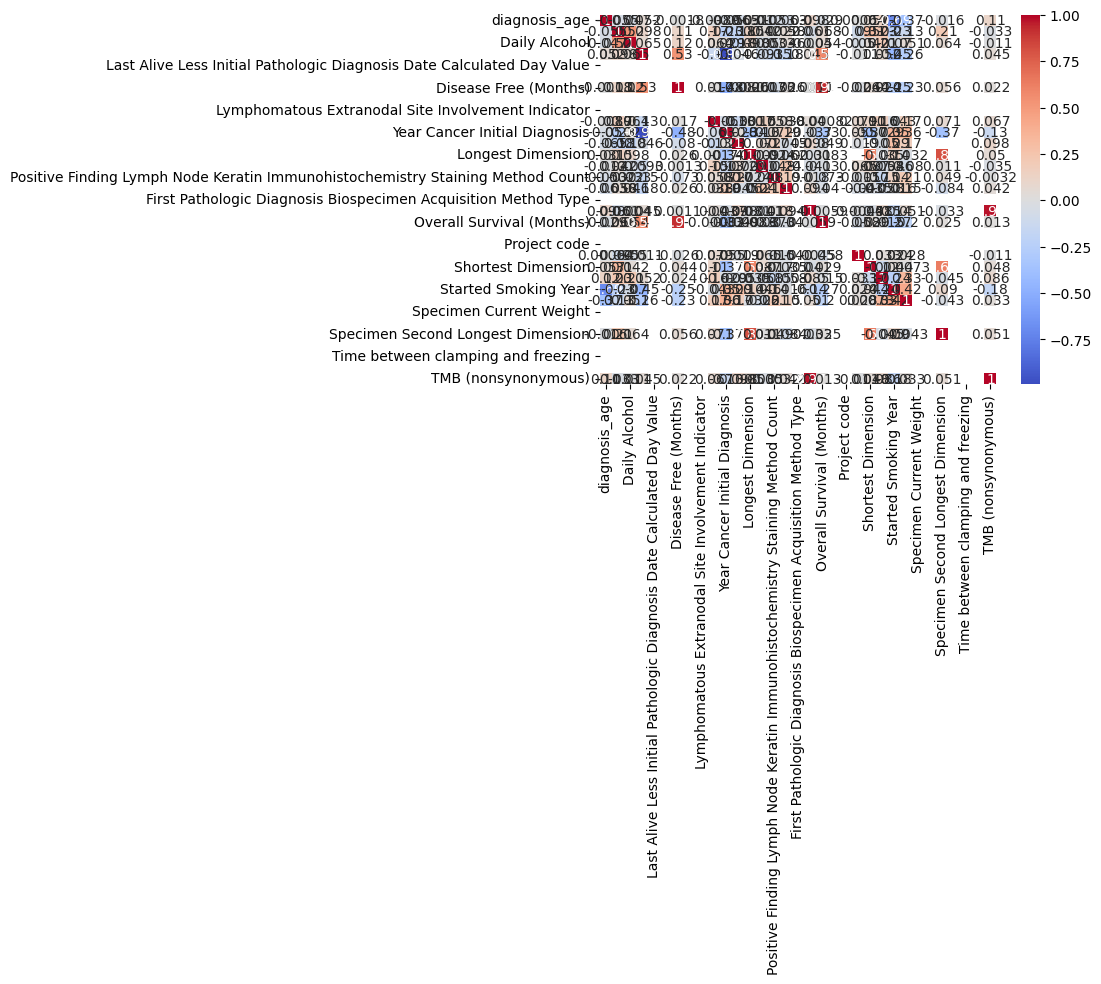

First 5 rows of the cleaned dataset:
    Study ID    patient_id        sample_id  diagnosis_age  \
0  hnsc_tcga  TCGA-4P-AA8J  TCGA-4P-AA8J-01           66.0   
1  hnsc_tcga  TCGA-BA-4074  TCGA-BA-4074-01           69.0   
2  hnsc_tcga  TCGA-BA-4075  TCGA-BA-4075-01           49.0   
3  hnsc_tcga  TCGA-BA-4076  TCGA-BA-4076-01           39.0   
4  hnsc_tcga  TCGA-BA-4077  TCGA-BA-4077-01           45.0   

  American Joint Committee on Cancer Metastasis Stage Code  \
0                                                 MX         
1                                                 M0         
2                                                 M0         
3                                                NaN         
4                                                 M0         

  Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code  \
0                                                N2c                          
1                                                N2c       

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data from a .tsv file
# Replace 'file_path' with the actual file path of your .tsv file
file_path = 'data/hnsc_tcga_clinical_data.tsv'
data = pd.read_csv(file_path, sep='\t')

# Step 2: Handle missing values for critical numerical and categorical columns
# Filling missing values in 'Diagnosis Age' with the median value
data['Diagnosis Age'].fillna(data['Diagnosis Age'].median(), inplace=True)

# Filling missing values in 'TMB (nonsynonymous)' with the mean value
data['TMB (nonsynonymous)'].fillna(data['TMB (nonsynonymous)'].mean(), inplace=True)

# Filling missing values in 'Patient Smoking History Category' with '[Unknown]'
data['Patient Smoking History Category'].fillna('[Unknown]', inplace=True)

# Step 3: Drop irrelevant or high-missing-value columns
# Dropping 'Primary Therapy Outcome Success Type' due to high missing values
data = data.drop(columns=['Primary Therapy Outcome Success Type'])

# Step 4: Convert categorical columns to category data type
data['Patient Smoking History Category'] = data['Patient Smoking History Category'].astype('category')
data['Person Neoplasm Status'] = data['Person Neoplasm Status'].astype('category')

# Step 5: Drop duplicates
data = data.drop_duplicates()

# Step 6: Rename columns for clarity
data.rename(columns={'Patient ID': 'patient_id', 'Sample ID': 'sample_id', 'Diagnosis Age': 'diagnosis_age'}, inplace=True)

# Step 7: Identify and print outliers as a list
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)].tolist()

numerical_columns = ['diagnosis_age', 'TMB (nonsynonymous)']  # Add more numerical columns as needed
outliers = {col: find_outliers(data[col]) for col in numerical_columns}

print("Outliers in the dataset:")
for col, outlier_list in outliers.items():
    print(f"{col}: {outlier_list}")

# Step 8: Plot correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Display the first few rows of the cleaned dataset
print("First 5 rows of the cleaned dataset:")
print(data.head())

# Save preprocessed data to a new file (optional)
# Replace 'output_file_path' with your desired output file path
# data.to_csv('output_file_path', sep='\t', index=False)

print("\nPreprocessing completed. Data is ready for analysis.")
